In [1]:
## 에지 ##
# 픽셀의 밝기 값이 급격하게 변하는 부분
# 객체와 객체, 객체와 배경의 경계를 나타내는 용어
# 영상에 미분을 하여 에지를 검출

In [2]:
# 노이즈에 취약한 단점을 극복하기 위해 평균값을 사용하는 3X3마스크에 가중치를 적용

In [3]:
# cv2.Sobel 함수에 대한 설명
# cv2.Sobel(src, ddepth, dx, dy, dst=None, ksize=None, scale=None, delta=None, borderType=None) -> dst

# • src: 입력 영상
# • ddepth: 출력 영상 데이터 타입. -1이면 입력 영상과 같은 데이터 타입을 사용.
# • dx: x 방향 미분 차수. 1차미분할지 2차미분 할지 결정
# • dy: y 방향 미분 차수.
# • dst: 출력 영상(행렬)
# • ksize: 커널 크기. 기본값은 3.
# • scale 연산 결과에 추가적으로 곱할 값. 기본값은 1.
# • delta: 연산 결과에 추가적으로 더할 값. 기본값은 0.
# • borderType: 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_DEFAULT.

In [4]:
# cv2.Scharr(src, ddepth, dx, dy, dst=None, scale=None, delta=None, borderType=None) -> dst

# • src: 입력 영상
# • ddepth: 출력 영상 데이터 타입. -1이면 입력 영상과 같은 데이터 타입을 사용.
# • dx: x 방향 미분 차수
# • dy: y 방향 미분 차수.
# • dst: 출력 영상(행렬)
# • scale 연산 결과에 추가적으로 곱할 값. 기본값은 1
# • delta: 연산 결과에 추가적으로 더할 값. 기본값은 0.
# • borderType: 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_DEFAULT

In [5]:
import cv2

In [6]:
src = cv2.imread('C:/Users/user/Desktop/data/Surface_Crack_Dataset/Positive/00001.jpg')
if src is None :
    print('Image load Failed!')
    sys.exit()
    
dx = cv2.Sobel(src, -1,1,0, delta=128) #delta값을 정하지않으면 미분이 -인 부분은 0이 된다
dy = cv2.Sobel(src, -1,0,1, delta=128)

cv2.imshow('src', src)
cv2.imshow('dx', dx)
cv2.imshow('dy', dy)
cv2.waitKey()

cv2.destroyAllWindows()

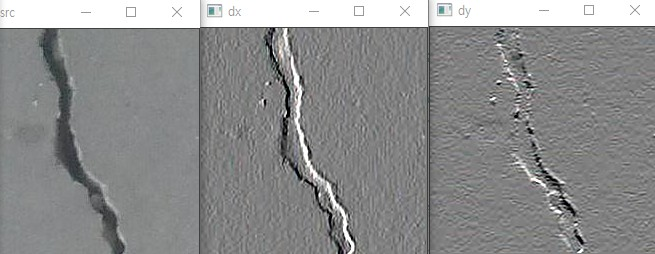

In [10]:
from PIL import Image
im = Image.open('./image/Screenshot 2021-03-19 at 20.30.22.jpg')
im

In [11]:
#x로 미분하면 y미분을 나타내지 못하고
#y로 미분하면 x미분을 나타내지 못해서 두 미분을 합쳐야 윤곽선 검출이 가능

In [12]:
# 2D 벡터의 크기 계산 함수

# cv2.magnitude(x, y, magnitude=None)

# • x: 2D 벡터의 x 좌표 행렬. 실수형.
# • y: 2D 벡터의 y 좌표 행렬. x와 같은 크기. 실수형
# • magnitude: 2D 벡터의 크기 행렬. x와 같은 크기, 같은 타입.

#2D 벡터의 방향 계산 함수

# cv2.phase(x, y, angle=None, angleInDegrees=None) -> angle

# • x: 2D 벡터의 x 좌표 행렬. 실수형.
# • y: 2D 벡터의 y 좌표 행렬. x와 같은 크기. 실수형.
# • angle: 2D 벡터의 크기 행렬. x와 같은 크기, 같은 타입.
# • angleInDegrees: True이면 각도 단위, False이면 래디언 단위

In [14]:
import numpy as np
src = cv2.imread('C:/Users/user/Desktop/data/Surface_Crack_Dataset/Positive/00001.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()



dx = cv2.Sobel(src, cv2.CV_32F, 1, 0) # float 형태의 미분값을 저장
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)


mag = cv2.magnitude(dx, dy) # 그래디언트 크기
mag = np.clip(mag, 0, 255).astype(np.uint8) # 255보다 커질 수 있으므로 saturate 연산

# 흰색과 검은색으로만 나타내는 윤곽선 생성
dst = np.zeros(src.shape[:2], np.uint8) # 0(검은색)으로 채워져 있는 영상 생성
dst[mag > 120] = 255 # 120은 임계값, 값을 적절하게 설정하면 내가 원하는 부분만 나타낼 수 있음

# dst = cv2.threshold(mag, 120, 255, cv2.THRESH_BINARY) # cv2 함수로 임계값 설정하기

cv2.imshow('src', src)
cv2.imshow('mag', mag)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

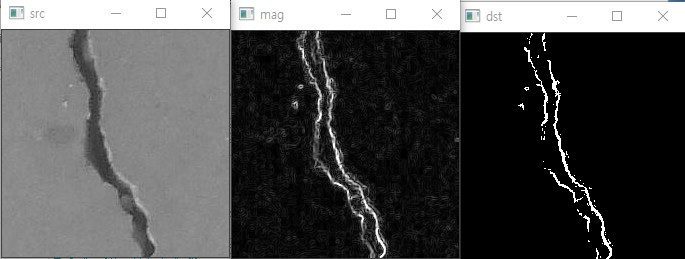

In [15]:
im = Image.open('./image/Screenshot 2021-03-19 at 20.44.19.jpg')
im

In [16]:
##여기서 윤곽선을 줄이는 방식으로 보완을 할 수 있다 ##
# 캐니 에지 검출

In [17]:
# 좋은 검출기의 조건 3가지
# 1. 조명에 의해 미세한 영향을 받을때, 임계점이 변화하는데 이때도 실제 에지를 잘 검출해내야한다
# 2. 정확한 위치 : 실제 에지의 중심을 검출해내야 한다
# 3. 하나의 에지는 하나의 점으로 표현해야한다

In [19]:
# 캐니 에지 검출방법
# 1. 가우시안 필터링
# - 노이즈를 제거
# 2. 그래디언트 계산
# - 크기와 방향을 계산(주로 소벨마스크를 사용)
# 3. 비최대 억제
# - 최대크기의 픽셀만 골라서 에지픽셀로 설정
# - 하나의 에지가 여러개의 픽셀로 표현되는 현상을 제거함.
# - 그래디언트의 크기가 국지적 최대인 픽셀만을 에지 픽셀로 설정
# 4. 히스테리시스 에지 트래킹
# - 두 개의 임계값 사용
# - 상한, 하한 임계값
# - 상한 임계값보다 높으면 강한 에지, 항상 에지로 선정함
# - 하한 < x < 상한 : 약한 에지, 강한에지와 연결되있을 경우, 에지로 선정
# - x < 하한 : 에지 X

In [20]:
# cv2.Canny(image, threshold1, threshold2, edges=None, apertureSize=None, L2gradient=None) -> edges

# • image: 입력 영상
# • threshold1: 하단 임계값
# • threshold2: 상단 임계값
# • edges: 에지 영상
# • apertureSize: 소벨 연산을 위한 커널 크기. 기본값은 3
# • L2gradient: True이면 L2 norm 사용, False이면 L1 norm 사용. 기본값은 False.

In [21]:
src = cv2.imread('C:/Users/user/Desktop/data/Surface_Crack_Dataset/Positive/00001.jpg', cv2.IMREAD_GRAYSCALE) # 그레이 스케일 영상

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.Canny(src, 50, 150) # 하단 임계값과 상단 임계값은 실험적으로 결정하기

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

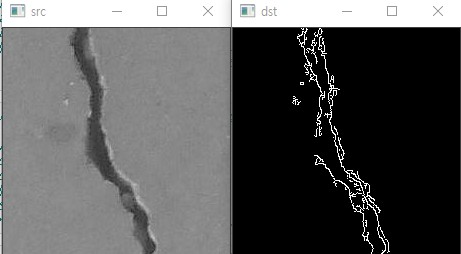

In [22]:
im = Image.open('./image/Screenshot 2021-03-19 at 20.56.15.jpg')
im

In [23]:
# 실제로 선을 얇게 만들수 있다